In [202]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Problem 1.1: Plot (draw) a network with:** 
- 2 inputs,
- 2 hidden layers (where the first layer contains 3 hidden units and the second contains 2 hidden units) and a
- 3-class output (use a softmax function)

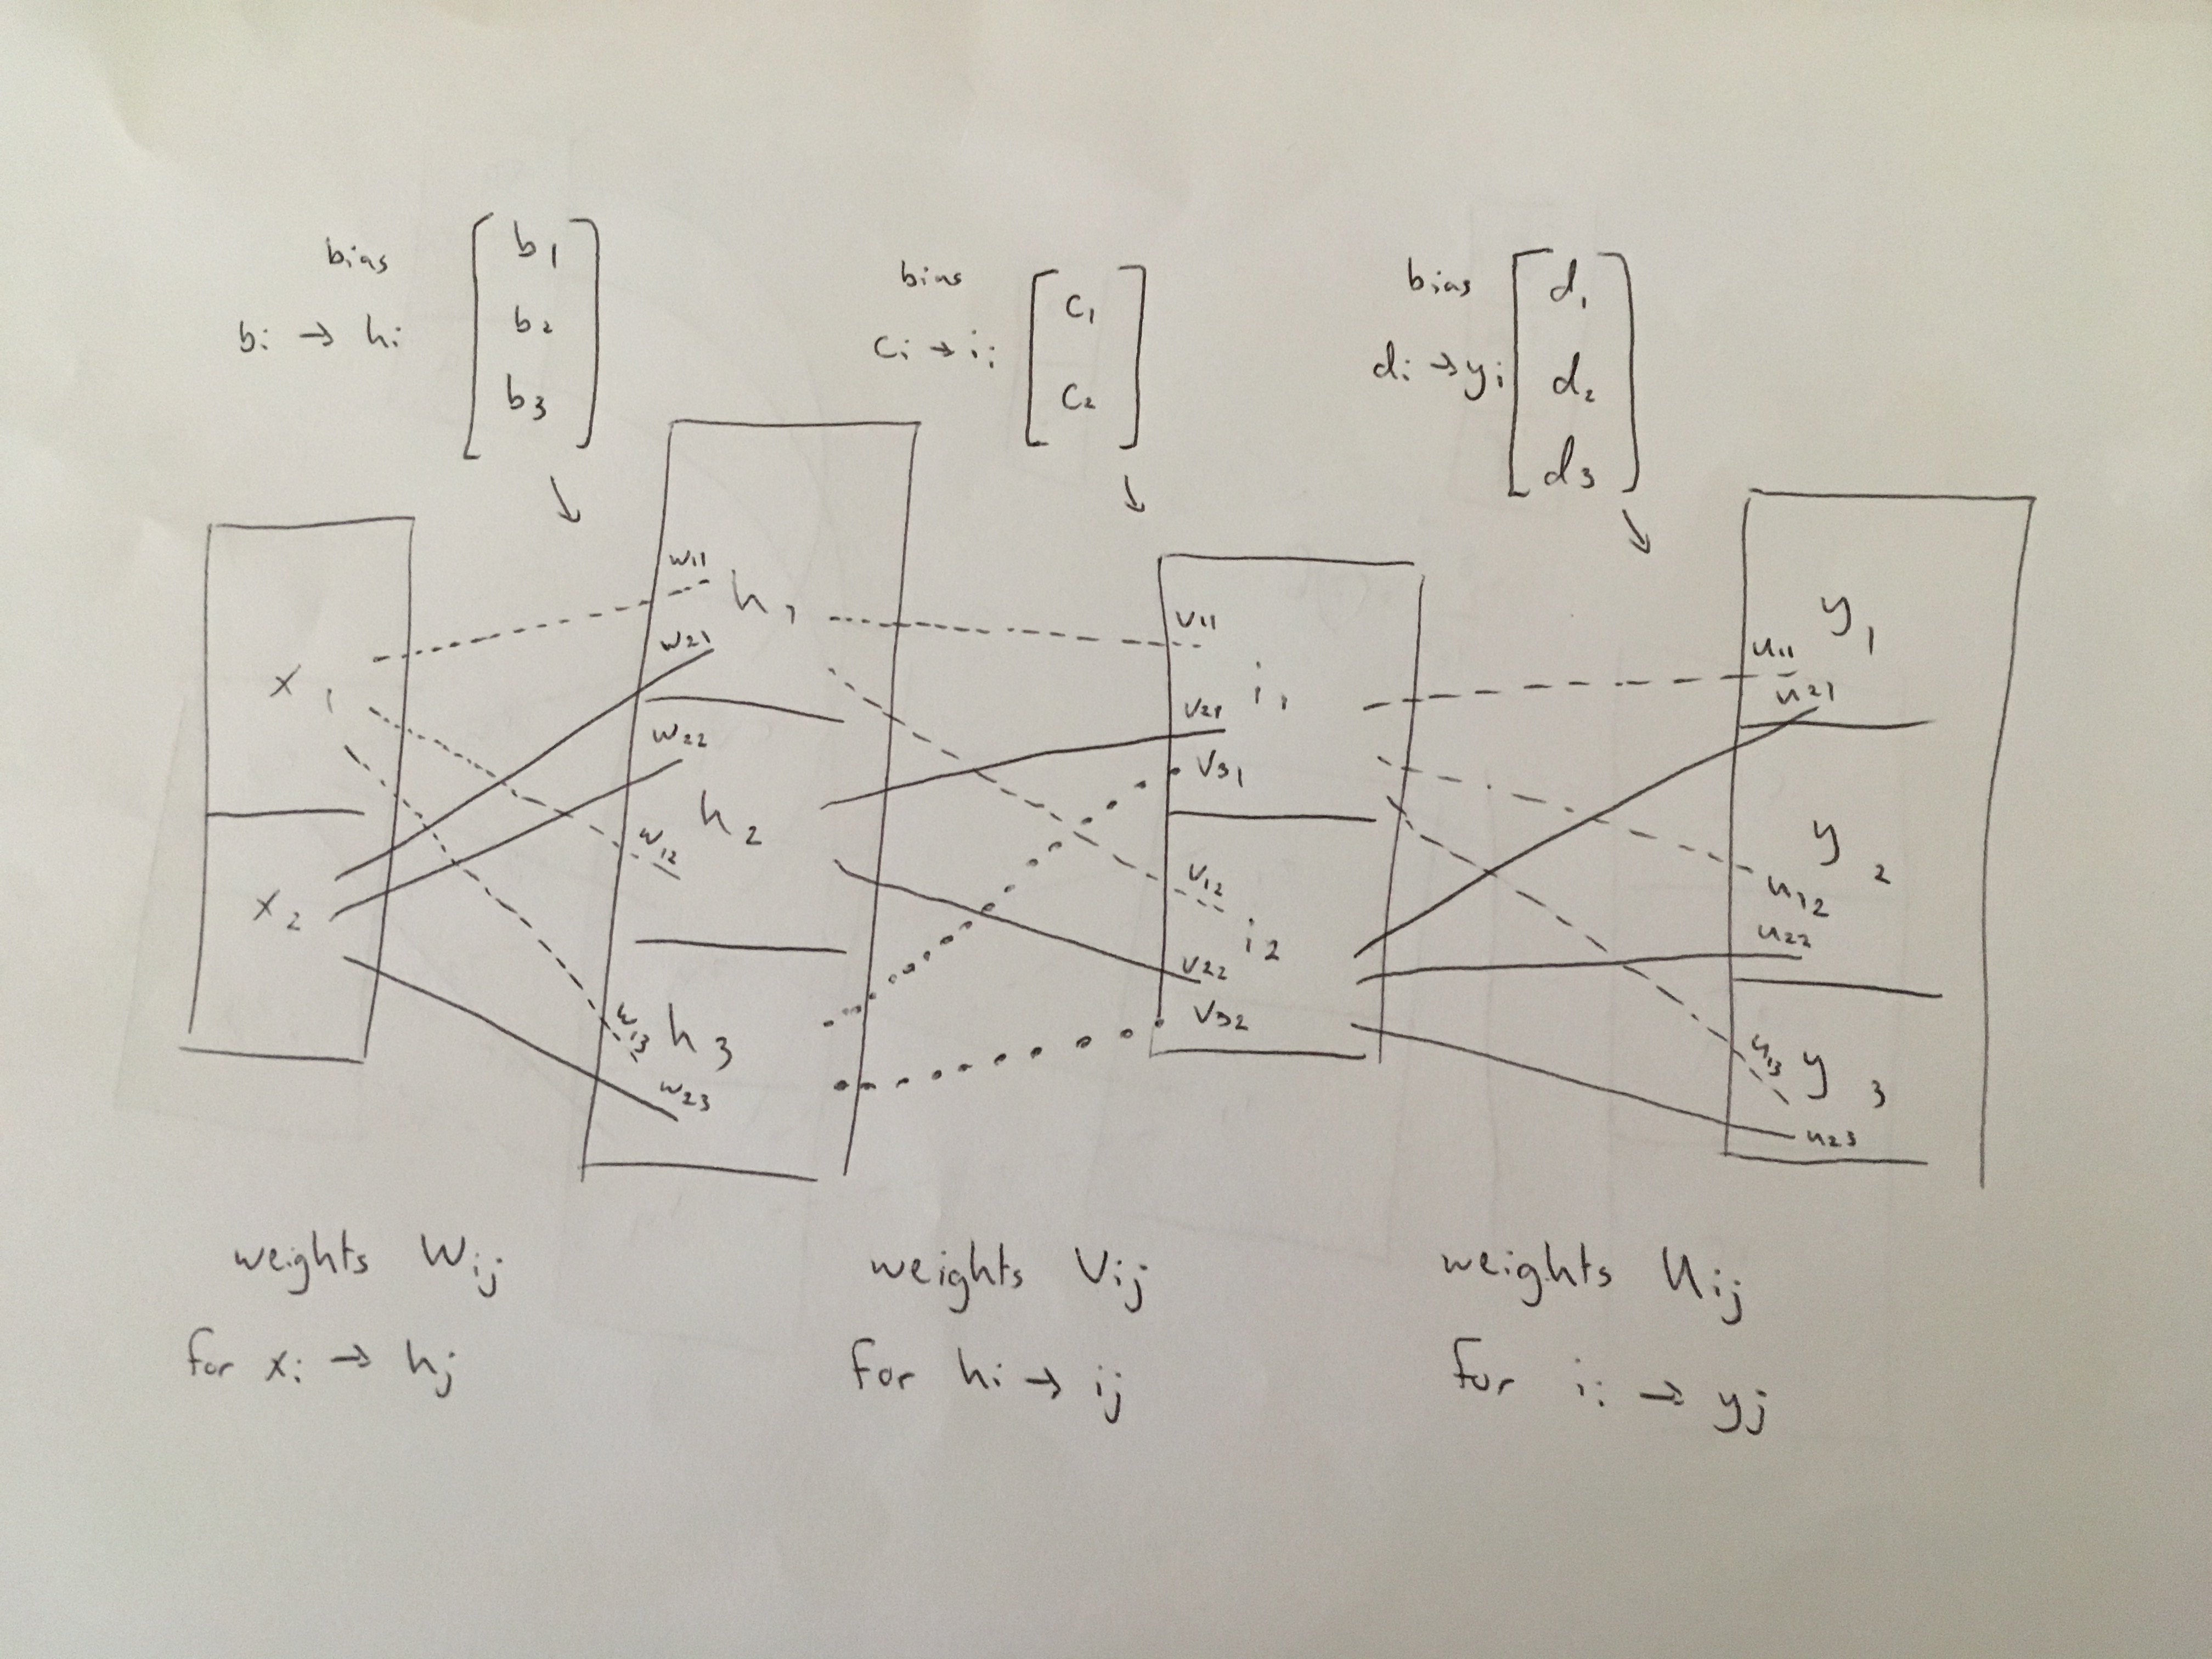

**Problem 1.2: Write out the mathematical equation for this network**

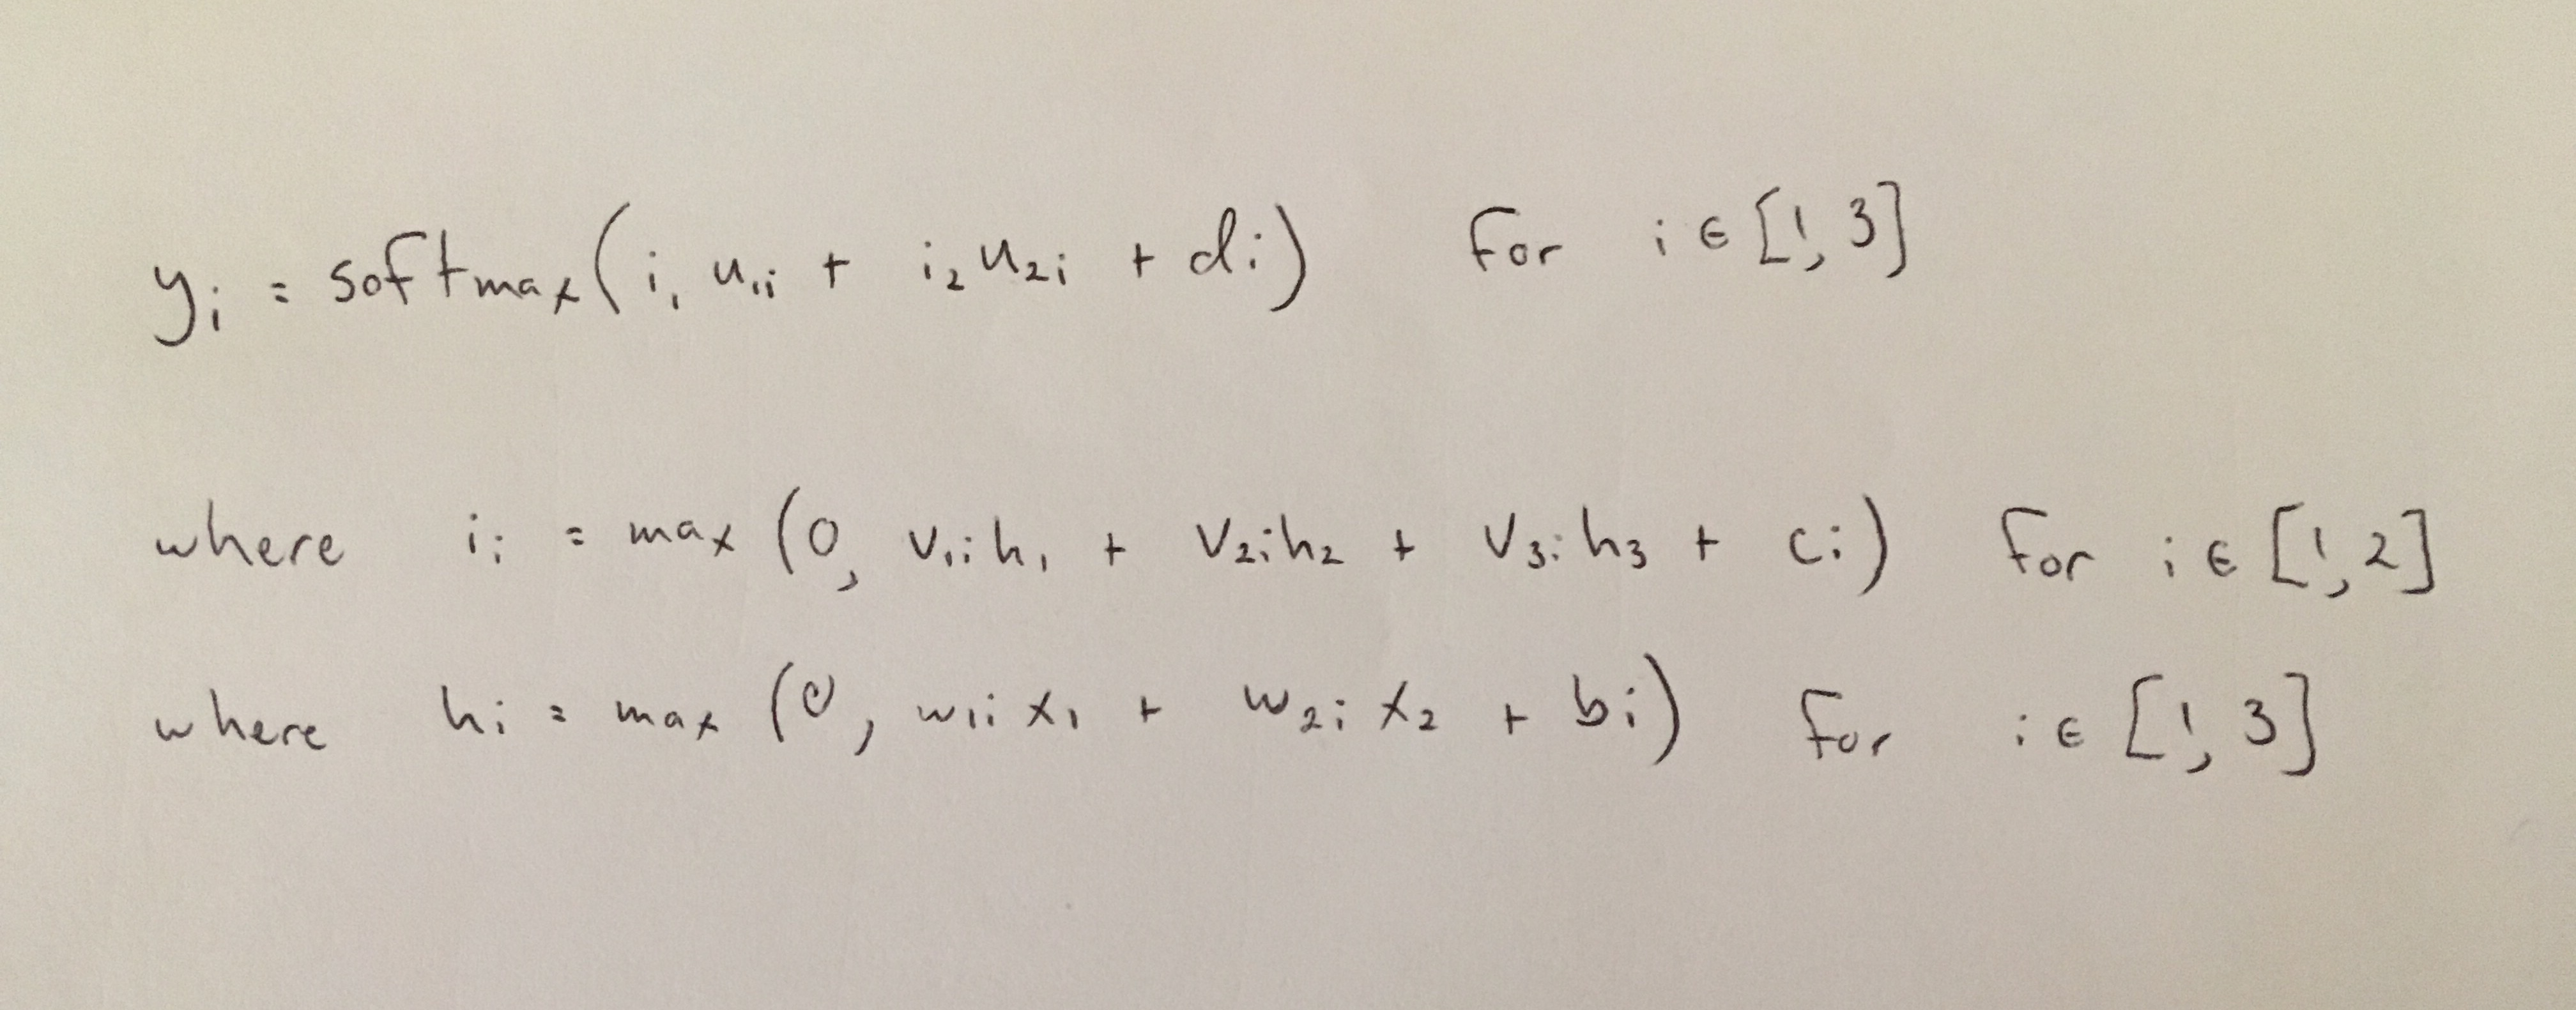

**Problem 1.3: Write out the function in python, call it ff nn 2 ReLu(...)**

The function relu(x) returns the maximum between each value in a matrix and zero. This function is taken from lecture notes.

In [217]:
def relu(x):
    return np.maximum(x,0)

The function softmax(z) computes the softmax of each value in a matrix and returns it. This function is taken from lecture notes.

In [218]:
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z)))

The function ff_nn_2_ReLu takes two vector or matrix inputs for a feedforward neural network with two hidden layers. It uses ReLu as the activation function for the first and second layers, and uses softmax as the activation function for the output layer. It returns the estimated output layer.

In [249]:
def ff_nn_2_ReLu(X, parameters):
    # unpack parameters: 
        #W, V, U --> weights
        #b, c, d --> biases
    W, b, V, c, U, d = parameters
    
    #Forward pass for 2 hidden layers with ReLu and softmax activation
    #first layer
    h = X.dot(W+b) 
    H = relu(h)
    #second layer
    i = H.dot(V+c) 
    I = relu(i)
    #output
    y = I.dot(U+d) 
    Y_hat = softmax(y)
    
    return softmax(Y_hat)

**Problem 1.4: Suppose you have the following set of weight matrices and inputs. What are the class probabilities associated with the forward pass of each sample?**

In [250]:
#weights
W = np.matrix('1,-1,0; 0,0,0.5') #W(1) transpose
V = np.matrix('1,-1; 0,-1; 0,0') #W(2) transpose
U = np.matrix('1,0,-1;1,0,-1') #V transpose

#biases 
b = np.matrix('0,0,1') #b(1) 
c = np.matrix('-1,-1') #b(2)
d = np.matrix('1,0,0') #c

#input 
X = np.matrix('1,-1; 0,-1; 0,1') #transpose

In [215]:
ff_nn_2_ReLu(X, (W,b,V,c,U,d))

matrix([[0.11111111, 0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111]])

We see that with the given weights, the class probabilities are all equal. 

**Problem 2.1:  What are the partial derivatives of f with respect to x and to y?**

In [208]:
x,y = symbols('x y', real = True)
f = ((1 - x)**2) + (100*(y - x**2)**2)

The partial derivative with respect to x is given by:

In [209]:
df_dx = diff(f,x)
df_dx

-400*x*(-x**2 + y) + 2*x - 2

The partial derivative with respect to y is given by:

In [210]:
df_dy = diff(f,y)
df_dy

-200*x**2 + 200*y

**Problem 2.2:  Create a visualization of the contours of the Rosenbrock function.**

From calculus, we know that the global minimum of the Rosenbrock function is at (1,1). We will visualsize the contours around that point.

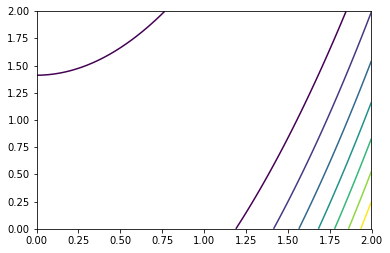

In [6]:
delta = 0.0025
x = np.arange(0, 2, delta)
y = np.arange(0, 2, delta)
X, Y = np.meshgrid(x, y)
Z = ((1 - X)**2) + (100*(Y - X**2)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

**Problem 2.3: Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.**

The function grad_f takes a 2D vector and returns the value of the gradient at that point. This function was taken from lecture notes. 

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = -400*x*(-x**2 + y) + 2*x - 2
    df_dy = -200*x**2 + 200*y
    return np.array([df_dx, df_dy], dtype = np.float128)

The fuction grad_descent takes (x,y) as starting point, the number of iterations to run, and the learning rate. It computes the trajectory for each iteration and returns the trajectory as an array. This function was taken from lecture notes.

In [8]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
        
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)

    return np.array(trajectory, dtype = np.float128)

We know the global minimum is (1,1) for the Rosenbrock funtion. We also know that it is a convex function with steep banks that can cause our gradient descent trajectory to oscillate out to infinity. We will cheat somewhat and start close to the known minimum at (0.5, 1.5). To dampen the oscillation towards the minimum, we will set our learning rate fairly low at 1e-3.

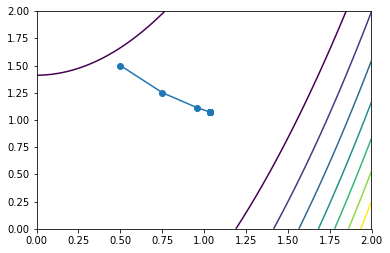

In [9]:
np.random.seed(123)

approx_min = [0.5, 1.5]

traj = grad_descent(starting_point = approx_min, iterations=20, learning_rate = 1e-3)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

We see in the plot above that the gradient descent is able to approximate the minimum at (1,1). We will now increase the learning rate to 1. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in longdouble_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longdouble_scalars
  after removing the cwd from sys.path.


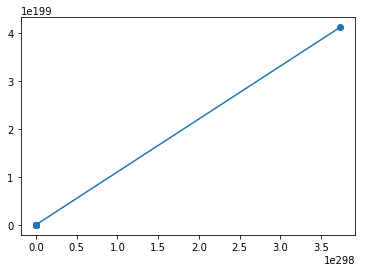

In [10]:
np.random.seed(123)

approx_min = [0.5, 1.5]

traj = grad_descent(starting_point = approx_min, iterations=20, learning_rate = 1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

Clearly, we see that for a learning rate of 1, our gradient descent spirals out to infinity. Our trajectory array given belows shows that we only completed six iterations before approaching infinity. 

In [11]:
traj

array([[ 0.5,  1.5],
       [ 251.5, -248.5],
       [-6.3881757e+09,  12699902.0],
       [ 1.0427749e+32,  8.1617578e+21],
       [-4.5355675e+98,  2.1747588e+66],
       [ 3.732114e+298,  4.1142746e+199],
       [-inf,  inf],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]], dtype=float128)

We will now set our learning rate even closer to zero at 1e-5. Over the same number of iterations, we see that for the smaller learning rate, our gradient descent converges to the minimum more rapidly than the gradient descent with a learning rate of 1e-3.

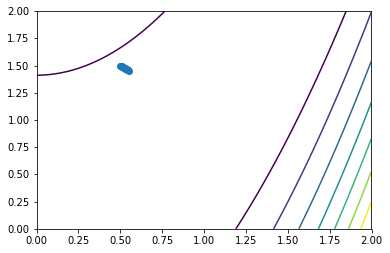

In [12]:
np.random.seed(123)

approx_min = [0.5, 1.5]

traj = grad_descent(starting_point = approx_min, iterations=20, learning_rate = 1e-5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

**Problem 2.4: Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.**

The fuction grad_descent_with_momentum takes (x,y) as starting point, the number of iterations to run, the momentum denoted as alpha, and the learning rate denoted as epsilon. It computes the trajectory for each iteration and returns the trajectory as an array. This function was taken from lecture notes.

In [13]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    
    if starting_point:
        point = starting_point
        
    else:
        point = np.random.uniform(-10,10,size=2)
    
    trajectory = [point]
    
    #v = np.zeros(point.size)
    v = np.zeros(len(point)) # Altered to fit list attributes
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

In this case, we once again help the algorithm by placing it close to the known minimum as a starting point. With a low epsilon value (learning rate) of 1e-3 and an alpha value (momentum parameter) of 0.5, the gradient descent with momentum converges to the minimum. 

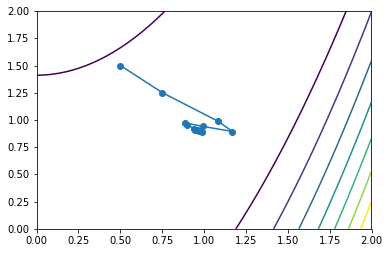

In [14]:
np.random.seed(123)

approx_min = [0.5, 1.5]
 
traj = grad_descent_with_momentum(starting_point = approx_min, iterations = 20, epsilon = 1e-3, alpha = 0.5) 

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

We will now remove the starting point of (0.5, 1.5) and let a random point between -10 and 10 be the new starting point. We will keep all other parameters the same.  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in longdouble_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longdouble_scalars
  after removing the cwd from sys.path.


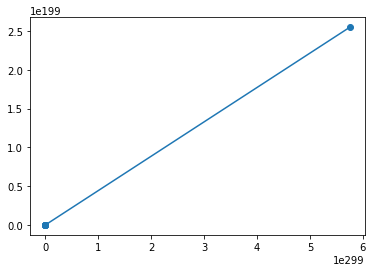

In [15]:
np.random.seed(123)
 
traj = grad_descent_with_momentum(iterations = 20, epsilon = 1e-3, alpha = 0.5) 

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

We see that without a starting point sufficiently close to the true minimum, the gradient descent with momentum fails to converge and oscillates out to infinity.

In [16]:
traj

array([[ 3.9293837, -4.2772133],
       [-27.067162, -0.33375937],
       [ 7893.2042,  148.23097],
       [-1.967066e+11,  12460727.0],
       [ 3.0445058e+33,  7.7386976e+21],
       [-1.1287829e+100,  1.8538032e+66],
       [ 5.7529589e+299,  2.5483017e+199],
       [-inf,  inf],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]], dtype=float128)

We will now alter the momentum parameter alpha and see how the algorithm behaves. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in longdouble_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longdouble_scalars
  after removing the cwd from sys.path.


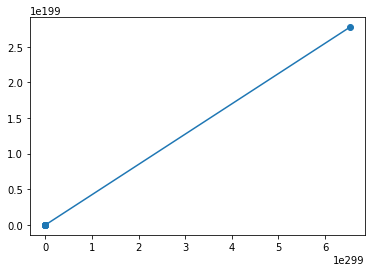

In [17]:
np.random.seed(123)
 
traj = grad_descent_with_momentum(iterations = 20, epsilon = 1e-3, alpha = .1) 

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

Once again, we see that the gradient descent with momentum fails to converge with smaller alpha (0.1).

In [18]:
traj

array([[ 3.9293837, -4.2772133],
       [-27.067162, -0.33375937],
       [ 7905.6028,  146.65359],
       [-1.9763503e+11,  12499843.0],
       [ 3.0878184e+33,  7.8119209e+21],
       [-1.1776473e+100,  1.9069245e+66],
       [ 6.532896e+299,  2.7737065e+199],
       [-inf,  inf],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]], dtype=float128)

We will now re-introduce the starting point (0.5, 1.5) and keep alpha the same (0.1).

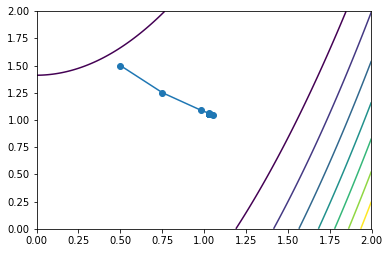

In [19]:
np.random.seed(123)

approx_min = [0.5, 1.5]
 
traj = grad_descent_with_momentum(starting_point = approx_min, iterations = 20, epsilon = 1e-3, alpha = 0.1) 

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

With the starting piont, the gradient descent with momentum algorithm managed to converge for alpha equal to 0.1.

**Problem 3.1: For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.**

    #Partial derivatives with respect to loss for weights
    dy_dW = np.transpose(x).dot(Y_hat - y).dot(V).dot(U).dot(np.transpose(H))
    dy_dV = np.transpose(H).dot(Y_hat - y).dot(np.transpose(U)).dot(np.transpose(I)) 
    dy_dU = np.transpose(I).dot((Y_hat - y))
    
    #Partial derivatives with respect to loss for biases
    dy_db = ((np.transpose((Y_hat - y).dot(V))).dot(H)).sum(axis=0)
    dy_dc = (np.transpose((Y_hat - y).dot(np.transpose(U))).dot(I)).sum(axis=0)
    dy_dd = (Y_hat - y).sum(axis=0)

**Problem 3.2: Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location**

The functions pack_params_2 and unpack_params_2 were taken from lecture notes with modification to fit the NN specified in Problem 1.

In [263]:
def pack_params_2(param_vec):
    (w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, 
     v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2,
     u_11, u_12, u_13, u_21, u_22, u_23, d_1, d_2, d_3) = param_vec
    
    W = np.array([[w_11, w_12, w_13],[w_21, w_22, w_23]])
    b = np.array([b_1, b_2, b_3])
    V = np.array([[v_11, v_21], [v_12, v_22], [v_13, v_23]])
    c = np.array([c_1, c_2])
    U = np.array([[u_11, u_12, u_13],[u_21, u_22, u_23]])
    d = np.array([d_1, d_2, d_3])
    
    return((W, b, V, c, U, d))

def unpack_params_2(W,b,V,c,U,d):
    w_11, w_12, w_13, w_21, w_22, w_23 = W[0,0], W[0,1], W[0,2], W[1,0], W[1,1], W[1,2]
    b_1, b_2, b_3 = b[0], b[1], b[2]
    
    v_11, v_12, v_13, v_21, v_22, v_23 = V[0,0], V[0,1], V[0,2], V[1,0], V[1,1], V[1,2]
    c_1, c_2 = c[0], c[1]
    
    u_11, u_12, u_13, u_21, u_22, u_23 = U[0,0], U[0,1], U[0,2], U[1,0], U[1,1], U[1,2]
    d_1, d_2, d_3 = d[0], d[1], d[2]
    
    return np.array([w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, 
                     v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2,
                     u_11, u_12, u_13, u_21, u_22, u_23, d_1, d_2, d_3])

The function grad_f was taken from lecture notes with modifications to fit the NN specified in Problem 1. It returns the gradient of the loss at a given point as an array with array positions corresponding to the values of the loss function for the weights and biases outlined in unpack_params_2.

In [497]:
def grad_f(param_vec, x, y):
        #W, V, U --> weights
        #b, c, d --> biases
    W, b, V, c, U, d = pack_params_2(param_vec)
    
    #first layer
    h = x.dot(W+b) 
    H = relu(h)
    #second layer
    i = H.dot(V+c) 
    I = relu(i)
    #output
    Y = I.dot(U+d) 
    Y_hat = softmax(y)
    
    #Partial derivatives with respect to loss for weights
    dy_dW = np.transpose(x).dot(Y_hat - y).dot(V).dot(U).dot(np.transpose(H))
    dy_dV = np.transpose(H).dot(Y_hat - y).dot(np.transpose(U)).dot(np.transpose(I)) 
    dy_dU = np.transpose(I).dot((Y_hat - y))
    
    #Partial derivatives with respect to loss for biases
    dy_db = ((np.transpose((Y_hat - y).dot(V))).dot(H)).sum(axis=0)
    dy_dc = (np.transpose((Y_hat - y).dot(np.transpose(U))).dot(I)).sum(axis=0)
    dy_dd = (Y_hat - y).sum(axis=0)
    
    param_vec = unpack_params_2(dy_dW, dy_db, dy_dV, dy_dc, dy_dU, dy_dd)
    return np.array(param_vec)

In [511]:
np.random.seed(123)
point = np.random.uniform(-.1,.1,size=26).astype("float128")
grad_f(point, x, y)

array([ 0.03916057, -0.00545964,  0.02725568, -0.09887853, -0.0493737 ,
       -0.13453403,  0.55396513, -0.10177082, -0.53032543,  0.0026864 ,
        0.00144219,  0.00375997,  0.00269377,  0.00144615,  0.00377027,
        0.01274785,  0.        , -0.06448778,  0.28027167, -0.2157839 ,
        0.        ,  0.        ,  0.        , -0.59472656,  1.12402344,
       -0.55273438], dtype=float128)

**Problem 3.3: Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters
that you’ll use for fitting your network. Plot your sample dataset, coloring data points by their respective class.**

The function gen_gmm_data was taken from lecture notes.

In [222]:
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
    
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


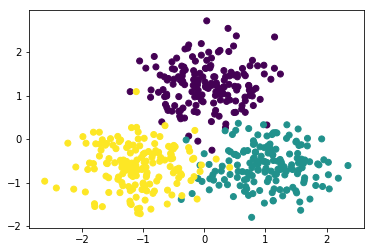

In [223]:
x,y,cl = gen_gmm_data(500)
plt.scatter(x[:,0], x[:,1], c = cl.ravel())

**Problem 3.4: Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.**

All functions defined below were taken from lecture notes.

In [224]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def pack_params(param_vec):
    w_11, w_12, w_21, w_22,b_1, b_2,v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3 = param_vec
    W = np.array([[w_11,w_12],[w_21,w_22]])
    b = np.array([b_1, b_2])
    v = np.array([[v_11, v_12, v_13],[v_21, v_22, v_23]])
    c = np.array([c_1, c_2, c_3])
    return((W, b, v, c))

def relu(x):
    return np.maximum(x,0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def unpack_params(W,b,v,c):
    w_11, w_12, w_21, w_22 = W[0,0], W[0,1], W[1,0], W[1,1]
    b_1, b_2 = b[0], b[1]
    v_11, v_12, v_13, v_21, v_22, v_23 = v[0,0], v[0,1], v[0,2], v[1,0], v[1,1], v[1,2]
    c_1, c_2, c_3 = c[0], c[1], c[2]
    return np.array([w_11, w_12, w_21, w_22,b_1, b_2,v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3])

def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a1 = x.dot(W) + b
    H = relu(a1)
    a2 = H.dot(v) + c
    y_hat = softmax(a2)
    
    d_v = H.T.dot((y_hat - y))
    d_c = (y_hat - y).sum(axis=0)
    d_W = x.T.dot(((y_hat - y).dot(v.T) * (H > 0))) 
    d_b = ((y_hat - y).dot(v.T) * (H > 0)).sum(axis=0)
    
    param_vec = unpack_params(d_W, d_b, d_v, d_c)
    return np.array(param_vec)

def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=15).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

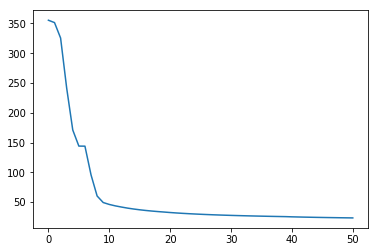

In [225]:
traj, losses = grad_descent(x, y, iterations=50,learning_rate=1e-2)
plt.plot(losses)

**Problem 3.5: Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.**

The function grad_descent_with_momentum was taken from lecture notes with some modification.

In [193]:
def grad_descent_with_momentum(x,y,starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=15).astype("float128")
        
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point,x,y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

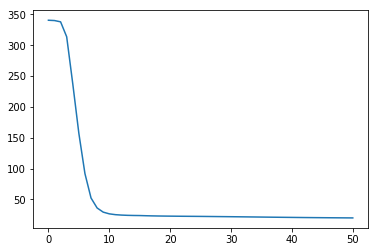

In [201]:
traj, losses = grad_descent_with_momentum(x, y, iterations=50, alpha = 0.5, epsilon=1e-2)
plt.plot(losses)

The gradient descent with momentum algorithm converges more efficiently. We see from the plots of the losses that gradient descent with momentum algorithm descends smoothly and converges towards zero, while the gradient descent algorithm trends downward, then spikes up briefly, before converging towards zero.